In [10]:
!pip install pandas
!pip install numpy
!pip install openpyxl
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 57.3 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 60.7 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
path_file = "./creditSIM.xlsx"
df = pd.read_excel(path_file)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            3000 non-null   int64  
 1   AgnosDirec    2999 non-null   float64
 2   AgnosEmpleo   2998 non-null   float64
 3   DeudaExt      2999 non-null   float64
 4   DeudaInt      2996 non-null   float64
 5   Edad          2998 non-null   float64
 6   Ingreso       2998 non-null   float64
 7   Ingreso2      3000 non-null   float64
 8   Nacionalidad  3000 non-null   object 
 9   NivelEdu      3000 non-null   object 
 10  VarObj        3000 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 257.9+ KB


In [22]:
df.describe(include='all').round(2)

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj
count,3000.00,2999.00,2998.00,2999.00,2996.00,2998.00,2998.00,3000.00,3000,3000,3000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,SupCom,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000,979,2363
mean,101500.50,7.09,7.15,4531.01,2275.68,37.66,62567.74,52152.67,NaN,NaN,NaN
std,866.17,6.96,6.65,7084.78,5409.79,36.63,49385.68,42246.04,NaN,NaN,NaN
min,100001.00,0.00,0.00,21.55,8.30,18.00,-13123.60,-9723.72,NaN,NaN,NaN
25%,100750.75,2.00,2.00,1110.24,416.04,29.00,30282.68,25109.56,NaN,NaN,NaN
50%,101500.50,5.00,5.00,2278.66,958.28,36.50,49516.13,40632.27,NaN,NaN,NaN
75%,102250.25,10.00,10.00,5093.77,2318.27,44.00,78851.47,66206.20,NaN,NaN,NaN


In [24]:
# Revisar valores nulos
df.isnull().sum()

ID              0
AgnosDirec      1
AgnosEmpleo     2
DeudaExt        1
DeudaInt        4
Edad            2
Ingreso         2
Ingreso2        0
Nacionalidad    0
NivelEdu        0
VarObj          0
dtype: int64

In [37]:
df["Edad"].value_counts().sort_index()

Edad
18.0        7
19.0       18
20.0       45
21.0       57
22.0       47
23.0       72
24.0       59
25.0       74
26.0       82
27.0       90
28.0      107
29.0       95
30.0       99
31.0       94
32.0      106
33.0      118
34.0      104
35.0      114
36.0      111
37.0      105
38.0      126
39.0       85
40.0      114
41.0      115
42.0      102
43.0       94
44.0       89
45.0       84
46.0       62
47.0       66
48.0       78
49.0       60
50.0       45
51.0       35
52.0       32
53.0       36
54.0       18
55.0       32
56.0       29
57.0       21
58.0       15
59.0        5
60.0       10
61.0        9
62.0        5
63.0        3
64.0        8
65.0        6
66.0        2
67.0        2
68.0        2
69.0        2
71.0        1
1970.0      1
Name: count, dtype: int64

<Axes: xlabel='Edad'>

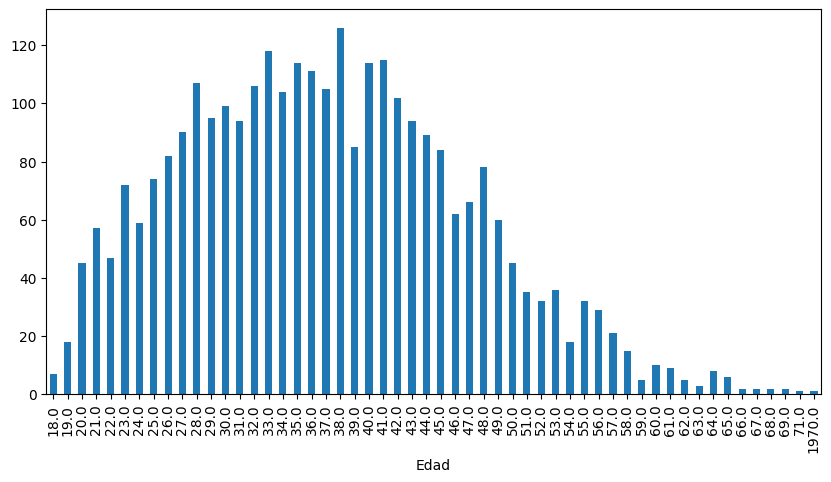

In [36]:
df["Edad"].value_counts().sort_index().plot(kind='bar', figsize=(10,5))

NameError: name 'plt' is not defined

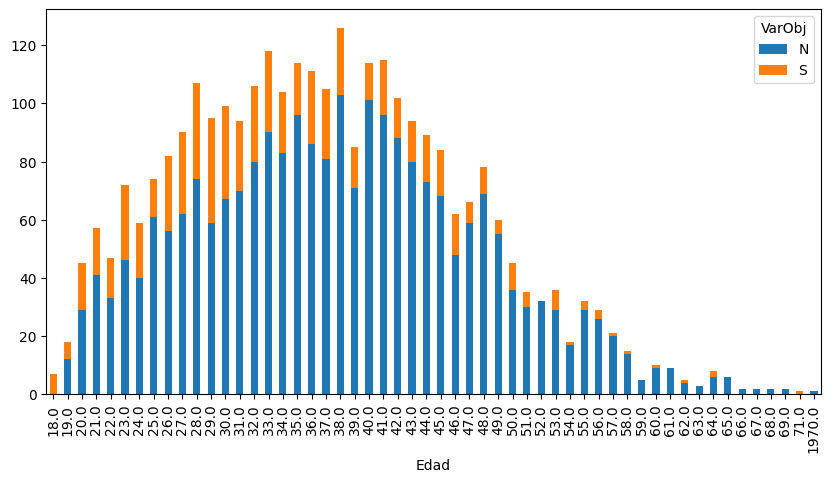

In [38]:

df.groupby(["Edad","VarObj"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))
plt.show()

In [55]:
df["VarObj"].value_counts(normalize=True).round(2)

VarObj
N    0.79
S    0.21
Name: proportion, dtype: float64

In [58]:
df[df['Edad'] > 100]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj
137,100138,7.0,13.0,11982.421363,8423.543356,1970.0,134230.440064,114093.282397,N,Med,N


In [59]:
df[df['Edad'] > 100] = np.nan

In [61]:
df[df['Edad'] > 100]
# ya no aparecera   

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj


In [62]:
df[df['Ingreso'] < 0]

,ID,AgnosDirec,AgnosEmpleo,DeudaExt,DeudaInt,Edad,Ingreso,Ingreso2,Nacionalidad,NivelEdu,VarObj
521,100522.0,3.0,0.0,797.023075,670.738436,29.0,-13123.60228,-9723.719313,N,Bas,S


In [63]:
df[df['Ingreso'] < 0] = np.nan
